# CHAPTER 4. 모델 훈련

지금까지는 머신러닝 모델 훈련과 훈련 알고리즘을 블랙박스처럼 취급했다. 

회귀 시스템을 최적화하고 숫자 이미지 분류기를 개선했으며 스팸 분류기를 처음부터 구축했지만 실제로 어떻게 작동하는지는 몰랐을 것이다.

많은 경우 구현의 상세사항을 실제로 알아야 할 필요는 없지만, 어떻게 작동하는지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있다.

이 장에서 언급하는 대부분의 주제는 신경망을 이해하고 구축하고 훈련시키는 데 필수적이다.

가장 간단한 모델 중 하나인 선형 회귀 모델을 훈련시키는 두 가지 방법을 생각해보자.

- 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 (훈련 세트에 대해 비용 함수를 최소화화는) 모델 파라미터를 해석적으로 구한다.
- 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 최소화한다. 그 외 BGD, SGD도 살펴본다.

그 다음에는 비선형 데이터셋에 훈련시킬 수 있는 다항 회귀를 살펴보고, **학습 곡선 Learning Curve**을 사용해 모델이 과대적합되는지 감지하는 방법도 살펴본다.

마지막으로 분류 작업에 널리 사용하는 모델인 로지스틱 회귀와 소프트맥스 회귀를 살펴보겠다.

# 1. 선형 회귀

일반적인 선형 모델은 입력 특성의 가중치 합과 **편향 Bias 또는 절편 Intercept**라는 상수를 더해 예측을 만든다.

$$ y^{pred} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n $$

이 식은 벡터 형태로 더 간단히 쓸 수 있다.

$$ h^{pred} = h_\theta(x) = \theta^TX $$

이것이 선형 회귀 모델이고, 모델을 훈련시킨다는 것은 **모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 변화시킨다는** 것이다.

이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 2장에서 회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)라고 했는데, 이를 최소화시키는 $\theta$를 찾으면 된다.

실제로는 RMSE보다 MSE를 최소화하는 것이 같은 결과를 내면서 더 간단하다.

$$ MSE(X, h_\theta) = \frac{1}{m}\sum_{i=1}^m(\theta^Tx^{(i)} - y^{(i)})^2$$



## 1.1 정규방정식

비용 함수를 최소화하는 $\theta$를 찾기 위한 해석적인 방법이 있다. 이를 **정규방정식 Normal Equation** 이라고 한다.

$$ \theta^{pred} = (X^TX)^{-1}X^Ty$$

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 만들어보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()

<Figure size 640x480 with 1 Axes>

이제 정규방정식을 사용해 $\theta^{pred}$ 값을 계산해보자.

In [2]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.26568082],
       [2.87481964]])

이 데이터를 생성하기 위해 사용한 실제 함수는 $y=4+3x_1 + \epsilon$ 이며, 매우 비슷한 값을 보인다.

이제 $\theta^{pred}$를 이용해 예측해보자.

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #모든 샘플에 x0 = 1 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.26568082],
       [10.0153201 ]])

In [5]:
X_new.shape

(2, 1)

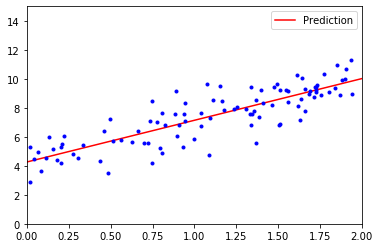

In [6]:
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.")
plt.legend()
plt.axis([0, 2, 0, 15])
plt.show()

같은 작업을 하는 사이킷런 코드는 아래와 같다.

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.26568082]), array([[2.87481964]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.26568082],
       [10.0153201 ]])

## 1.2 계산 복잡도

정규방정식은 (n + 1) x (n + 1) 크기가 되는 $X^TX$의 역행렬을 계산한다.

역행렬을 계산하는 **계산 복잡도 Computational Complexity**는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$사이이다.

다시 말해, 특성 수가 두 배로 늘어나면 계산 시간이 대략 5.3에서 8배로 증가한다.

---

**Caution** 특성 수가 매우 많아지면 정규방정식이 매우 느려진다.

---

다행인 점은, 이 공식의 복잡도가 훈련 세트의 샘플 수에는 선형적으로 증가한다는 것이다. ($O(m)$) 따라서 메모리가 허락한다면 큰 훈련 세트도 효율적으로 처리할 수 있다.

또한 선형 회귀 모델은 예측이 매우 빠르고, 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이라 샘플 또는 특성이 두 배 늘어나면 걸리는 시간도 거의 두 배 증가한다.

이제 아주 다른 방법으로 같은 선형 회귀 모델을 훈련시켜 볼 것이다. 이 방법은 **특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다.**

# 2. 경사 하강법

**경사 하강법, Gradient Descent, GD**은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 매우 일반적인 최적화 알고리즘이다.

기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

파라미터 벡터 $\theta$에 대해 비용 함수의 현재 **그래디언트 Gradient**를 계산하고, 그래디언트가 감소하는 방향으로 진행한다. 0이 되면 최솟값에 도달한 것이다.

구체적으로 보면, $\theta$를 임의의 값으로 시작해 (**무작위 초기화 Random Initialization**) 한번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 점진적으로 알고리즘을 향상시킨다.

경사하강법에서 중요한 파라미터는 **스텝의 크기**로 **학습률 Learning Rate**이라는 하이퍼파라미터로 결정된다. 너무 작으면 반복을 많이 진행해야 하므로 시간이 오래 걸린다.

반대로 너무 크면 더 큰 값으로 발산하게 되어 적절한 해법을 찾기 힘들게 된다.

패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다. **무작위 초기화** 때문에 알고리즘이 왼쪽에서 시작하면 **전역 최솟값 Global Minimum**보다 덜 좋은 **지역 최솟값 Local Minimum**에 수렴하게 된다. 

다행히 선형 회귀를 위한 MSE 비용 함수는 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수 Convex Function**이다. 또한 연속된 함수이며 기울기가 갑자기 변하지 않는다.

사실 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. 이는 어떤 특성이 더 작을 경우, 비용 함수에 영향을 주기 위해 그 특성이 더 크게 바뀌어야 하기 때문이다.

결국 모델 훈련이란, 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일이고, 이를 **모델의 파라미터 공간 Parameter Space**에서 찾는다고 말한다.

모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색은 더 어려워진다. 

## 2-1. 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야 한다. 다시 말해, $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다.

이를 **편도 함수 Partial Derivative**라고 하는데, 파라미터 $\theta_j$에 대한 비용 함수의 편도함수는 아래와 같다.

$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^TX^{(i)}-y^{(i)})(x_j)^{(i)} $$

각각에 대한 비용 함수를 한 번에 아래와 같이 표현할 수도 있다.

$$ \nabla_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta-y) $$

---

**Caution** 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다.

그래서 이 알고리즘이 배치 경사 하강법이라 불린다. 이런 이유로 매우 큰 훈려 세트에서는 아주 느리지만, 경사 하강법은 특성 수에 민감하지 않다.

수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

---

위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다.

$\theta$에서 $\nabla_\theta MSE(\theta)$를 빼야 한다는 뜻이다. 여기서 학습률 $\eta$가 사용된다.

$$ \theta^{(next step)} = \theta - \eta\nabla_\theta MSE(\theta)$$

In [9]:
eta = 0.1 #Learning Rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #Random Initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.26568082],
       [2.87481964]])

정규방정식으로 찾은 값과 거의 같은 것을 볼 수 있다. 

학습률에 따른 경사 하강법을 살펴보자.

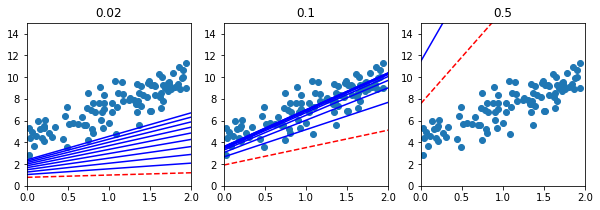

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

etas = [0.02, 0.1, 0.5]
n_iterations = 1000
m = 100


for ax, eta in zip((ax1, ax2, ax3), etas):
    ax.scatter(X, y)
    np.random.seed(42)
    theta = np.random.randn(2, 1)

    for iteration in range(n_iterations):    
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if(iteration<10) :
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(X_new, y_predict, style)
            ax.set_title(eta)
            ax.axis([0, 2, 0, 15])

왼쪽은 학습률이 너무 낮고, 가운데는 적당해 보인다. 오른쪽은 학습률이 너무 높아 스텝마다 최적점에서 멀어져 발산하게 된다.

적절한 학습률을 찾으려면 그리드 탐색을 사용하는데, 수렴하는 데 너무 오래 걸리는 모델을 막기 위해선 반복 횟수를 제한해야 한다.

이를 위한 방법은, 방법 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 놈이 어떤 값보다 작아지면 알고리즘을 중지하는 것이다.
(경사 하강법이 거의 최솟값에 도달한 것이므로)

---

**Tip. 수렴율**

비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우, 학습률을 고정한 배치 경사 하강법은 결국 최적의 솔루션에 수렴할 것이다.

$\epsilon$의 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(1/\epsilon)$의 반복이 걸릴 수 있다. 다시 말해, 허용오차 $\epsilon$을 1/10로 줄이면 알고리즘의 반복은 10배 늘어날 것이다.

---

# 2.2 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산한다는 사실이다. 훈련 세트가 커지면 매우 느려지게 된다.

이와 반대로 **확률적 경사 하강법 Stochastic Gradient Descent**은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산한다.

매우 적은 데이터만 처리하기 때문에 알고리즘이 훨씬 빠르고, 메모리에 하나의 샘플만 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다.

**반면에,** 확률적이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소한다.

이러한 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다.

이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다. 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다. 

매 반복에서 학습률을 결정하는 함수를 **학습 스케줄 Learning Schedule**이라고 한다. 



In [11]:
n_epochs = 50
t0, t1 = 5, 50 #Learning Schedule Parameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #Random Init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[4.25623331],
       [2.91886187]])

일반적으로 한 반복에서 $m$번 되풀이 되고, (샘플 수만큼) 이때 각 반복을 **에포크 epoch**라고 한다.

배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안, 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

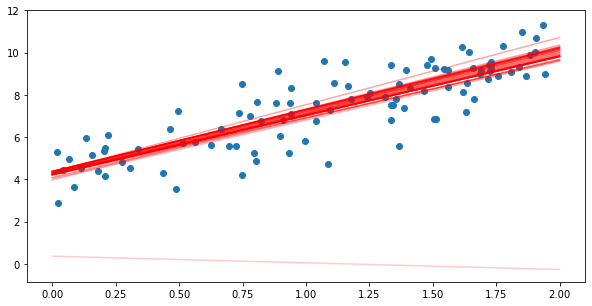

In [13]:
plt.figure(figsize=(10,5))

theta = np.random.randn(2, 1) #Random Init

for epoch in range(20):

    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, color = 'red', alpha = epoch/20+0.2)

    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.scatter(X, y)
plt.show()

샘플을 무작위로 섞기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 않을 수도 있다.

알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서는 다시 섞는 방법이 있다. (scikit-learn의 SGD가 이 방법을 쓴다.)

하지만 이렇게 하면 보통 더 늦게 수렴된다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다.

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

---

**Tip. 학습률**

일반적으로 `SGDRegressor`에서 학습 스케줄을 의미하는 매개변수 `learning_rate`의 기본값은 `invscaling`으로, 반복 횟수 t와 eta0, power_t 두 매개변수를 (기본값은 각가 0.01, 0.25) 사용한 다음 공식으로 학습률을 계산한다.

$$ \eta^{(t)} = \frac{eta0}{t^{power_t}}$$

`SGDClassifier`의 `learning_rate`의 기본값은 optimal로, 다음 공식을 사용한다.

$$ \eta^{(t)} = \frac{1}{alpha(t_0+t)} $$

여기서 $t_0$는 페이스북의 머신러닝 연구원 레옹 보투가 제안한 값으로, alpha 매개변수와 비용 함수에 따라 결정된다.

---

In [15]:
#정규방정식으로 구한 것과 매우 비슷한 값이다.
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21727575]), array([3.00645771]))

## 2.3 미니배치 경사 하강법

마지막으로 볼 경사 하강법 알고리즘은 **미니배치 경사 하강법 Mini-batch Gradient Descent**이다. 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그래디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산한다.

확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 **행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.**

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 되지만, 한편으로는 지역 최솟값에서 빠져나오기 더 힘들지도 모른다.

(선형 회귀가 아닌, 지역 최솟값이 문제가 되는 비선형의 경우)


In [16]:
np.random.rand(3, 1)

array([[0.69933947],
       [0.330561  ],
       [0.74473673]])

In [17]:
X_b[np.random.randint(0,50, 3)]

array([[1.        , 0.20624819],
       [1.        , 1.61358398],
       [1.        , 1.66049976]])

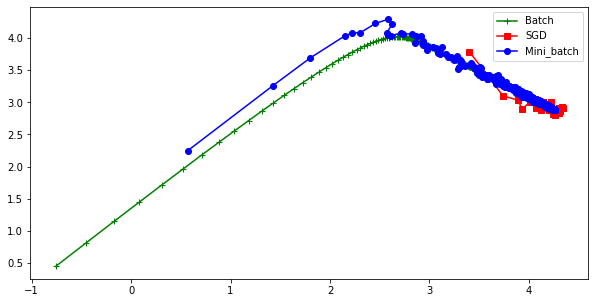

In [18]:
plt.figure(figsize=(10,5))


# Batch
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
theta_list = []

eta = 0.02
for iteration in range(n_iterations):    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_list.append(theta)

theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], theta_list[:,1], 'g-+', alpha = 1, label='Batch')

# SGD
theta = np.random.randn(2, 1) #Random Init
theta_list = []
for epoch in range(100):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    theta_list.append(theta)

theta_list = np.array(theta_list)

plt.plot(theta_list[:,0], theta_list[:,1], 'r-s', alpha = 1, label='SGD')

# mini-Batch
theta = np.random.randn(2, 1)
theta_list = []

eta = 0.02
minibatch_size = 20
t = 0
for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients        
        theta_list.append(theta)

theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], theta_list[:,1], 'b-o', alpha = 1, label='Mini_batch')


plt.legend()
plt.show()

위 그림은 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 어떻게 움직였는지 보여준다. 

지금까지 논의한 알고리즘을 선형 회귀에 적용해보면 아래와 같다.

- 정규방정식 : m 빠름 / n 느림 / 스케일 조정 No / sklearn-LinearRegression
- 배치경사하강법 : m 느림 / n 빠름 / 스케일 조정 Yes / -
- 확률적경사하강법 : m 빠름 / n 빠름 / 스케일 조정 Yes / sklearn-SGDRegressor
- 미니배치경사하강법 : m 빠름 / n 빠름 / 스케일 조정 Yes / -

**이 알고리즘들은 훈련 결과에 거의 차이가 없고, 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측한다.**

# 3. 다항 회귀

가지고 있는 데이터가 단순한 직선보다 복잡한 형태라면 어떨까? 신기하게도 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다.

간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.

이런 기법을 **다항 회귀 Polynomial Regression** 이라고 한다.

우선 간단한 2차 방정식으로 비선형 데이터를 생성해보자.

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

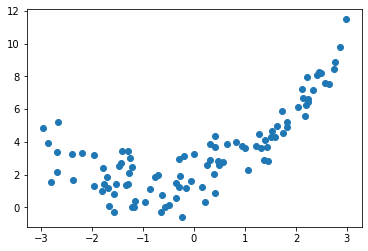

In [20]:
plt.scatter(X, y)
plt.show()

직선은 이 데이터에 확실히 잘 맞지 않을 것이다. 그러므로 사이킷런의 `PolynomialFeatures`를 사용해 훈련 데이터를 변환해보자.

훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한다.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]  #X_poly는 원래 특성 X와 이 특성의 제곱을 포함한다.

(array([-1.68370331]), array([-1.68370331,  2.83485682]))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.72716753]), array([[0.99626563, 0.58650092]]))

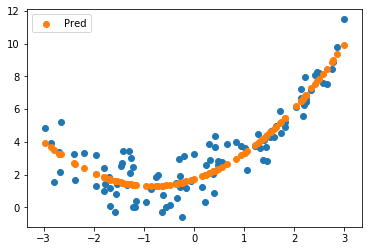

In [23]:
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(X_poly), label="Pred")
plt.legend()
plt.show()

결과가 괜찮은 것ㄷ을 볼 수 있다. 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다. (일반적인 선형 회귀 모델에서는 불가능하다.)

`PolynomialFeatures`가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다. 예를 들어, 두 개의 특성 a, b에 대해 `degree`가 3이라면 $a^2$, $a^3$, $b^2$, $b^3$, $ab$, $a^2b$, $ab^2$ 모두 특성으로 추가된다.

따라서 특성 수가 엄청나게 늘어날 수 있으니 주의하자.


# 4. 학습 곡선

고차 다항 회귀를 적용하면 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려고 한다.

예를 들어, 300차 다항 회귀 모델을 이전 훈련 데이터에 똑같이 적용해보면 어떻게 될까.

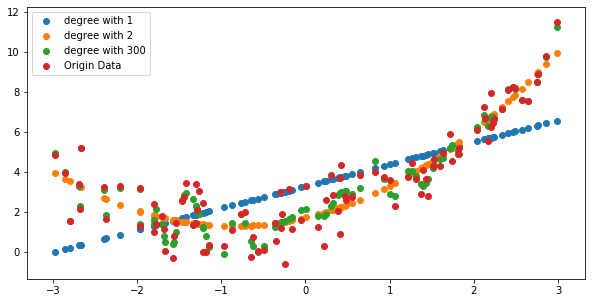

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def make_and_plot(X, y, n):
    poly_features = PolynomialFeatures(degree=n)
    std_scaler = StandardScaler()
    
    poly_reg = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    
    poly_reg.fit(X, y)
    y_pred = poly_reg.predict(X)
    
    plt.scatter(X, y_pred, label="degree with {}".format(n))

    
plt.figure(figsize=(10, 5))
for degree in [1, 2, 300]:    
    make_and_plot(X, y, degree)
plt.scatter(X, y, label="Origin Data")
plt.legend()
plt.show()

확실히 300차 다항 회귀 모델이 훈렴 샘플에 가능한 한 가까이 가기 위해 구불구불하게 나타나는 것을 알 수 있다.

이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되어있다. 반면에 선형 모델은 과소적합이다.

이 경우, 일반화가 가장 잘 된 경우는 2차 다항 회귀이다. 그렇다면 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까?

어떻게 모델이 과대적합 또는 과소적합되었는지 알 수 있을까?

2장에서 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용했다. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이고, 양쪽 모두 좋지 않다면 과소적합된 것이다.

또 다른 방법은 **학습 곡선**을 사용하는 것인데, 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.

이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.

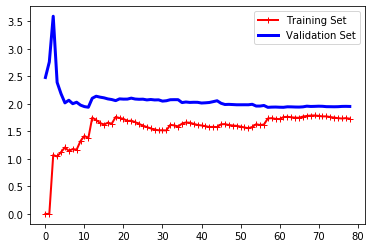

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_erros = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_erros.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set")
    plt.plot(np.sqrt(val_erros), "b-", linewidth=3, label="Validation Set")
    plt.legend()
    plt.show()
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

먼저 훈련 데이터의 성능을 살펴보자. **그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동한다.**

하지만 샘플이 추가됨에 따라 노이즈도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것은 불가능해진다.

그래서 곡선이 어느정도 평편해질 때까지 오차가 계속 상승하게 된다. 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지는 않는다.

검증 데이터의 경우, 모델이 적은 수의 훈련 샘플은 일반화될 수 없어 오차가 매우 크다. 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차는 천천히 감소한다.

하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져 훈련 세트의 그래프와 가까워진다.

**이 학습 곡선은 과소적합 모델의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다.**

이제 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그려보자.

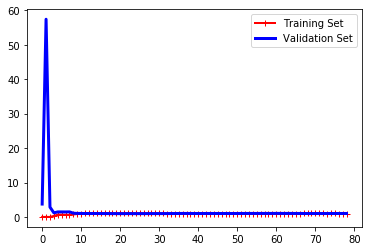

In [26]:
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()

polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])

plot_learning_curves(polynomial_regression, X, y)

이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있다.
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이에 공간이 존재한다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

---

**Tip. 과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것이다.**

**편향/분산 트레이드오프**

통게학의 가장 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실이다.

- 편향 : 일반화 오차 중에서 잘못된 가정으로 인한 것이다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.
- 분산 : 분산 Variance은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타납니다. 
- 줄일 수 없는 오차 : 줄일 수 없는 오차 irreducible error은 데이터 자체에 있는 노이즈이다.

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고, 편향은 줄어든다. 반대로 모델의 복잡도가 낮아지면 편향이 커지고 분산이 작아진다.

그래서 트레이드오프라고 부른다.

---

# 5. 규제가 있는 선형 모델

1, 2장에서 보았듯 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 자유도를 줄이면 데이터에 과대적합되기 더 어려워진다.

예를 들어, 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 각기 다른 방법으로 가중치를 제한하는 **릿지 회귀**, **라쏘 회귀**, **엘라스틱넷**을 살펴보자.

## 5.1 릿지 회귀

**릿지 회귀 Ridge Regression 또는 티호노프 규제 Tikhonov**는 규제가 추가된 선형 회귀 버전이다.

규제항 $\alpha\sum_{i=1}^n{\theta_i}^2$이 비용 함수에 추가된다. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다.

규제항은 훈련하는 동안에만 비용 함수에 추가되며, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다. (즉, 테스트 세트에서 성능을 평가하거나 실제 샘플을 예측할 때는 포함되지 않는다.)

---

**Note.**
일반적으로 훈련하는 동안 사용하는 비용 함수와 테스트에서 사용되는 성능 지표는 다르다.

규제를 떠나서 다른 이유는 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문이고, 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 하기 때문이다.

로그 손실 비용 함수를 사용하여 훈련시킨 분류기를 정밀도/재현율을 사용하여 평가하는 것이 좋은 예이다.

---

하이퍼파라미터 알파는 모델을 얼마나 많이 규제할지 조절한다. 0이라면 릿지 회귀는 선형 회귀와 같아지고, 아주 크면 모든 가중치가 거의 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

릿지 회귀의 비용 함수는 아래와 같다.

$$ J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n{\theta_i}^2 $$

여기서 편향 $\theta_0$는 규제되지 않는다. (합 기호가 i=1에서 시작한다.)

w를 특성의 가중치 벡터($\theta_1$에서 $\theta_n$)라고 정의하면 규제항은 $\frac{1}{2}{norm(w)_2}^2$과 같다.

---

**Caution.** 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다. 

규제가 있는 모델은 대부분 마찬가지이다.

---



다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예이다. (안드레 루이 숄레스키가 발견한 행렬 분해 Matrix Factorization르 사용한다.)

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.93677721]])

다음은 확률적 경사 하강법을 이용한 경우이다. 대안으로 `Ridge`에 `solver="sag"`을 사용할 수 있는데, 이는 확률적 평균(Average) 경사 하강법의 약자이다.

여기서 `penalty` 매개 변수는 사용할 규제를 지정한다. `l2`는 SGD가 비용 함수에 가중치 벡터의 놈 제곱을 2로 나눈 규제항, 즉 릿지 회귀와 같은 방식을 취한다.

In [28]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\ud803\Anaconda3\envs\hands_on_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([4.18515037])

아래는 선형 데이터에 몇 가지 다른 알파를 사용해 릿지 모델을 훈련시킨 결과이다.

알파 값을 증가시킬수록 직선에 가까워지는 것을 볼 수 있다. 즉, 모델의 분산은 줄지만 편향은 커지게 된다.

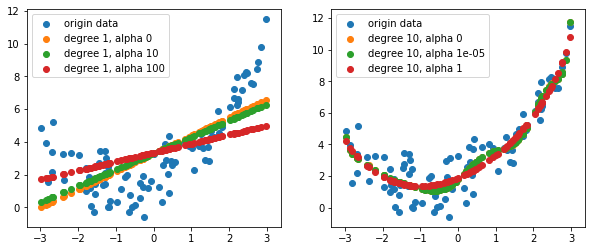

In [29]:
def plot_ridge_reg(X, y, degree, alpha, axis):
    poly_features = PolynomialFeatures(degree=degree)
    std_scaler = StandardScaler()
    ridge = Ridge(alpha=alpha, solver = "cholesky")
    
    ridge_polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("ridge_reg", ridge)
    ])
    
    ridge_polynomial_regression.fit(X, y)
    y_predict = ridge_polynomial_regression.predict(X)
    
    axis.scatter(X, y_predict, label = 'degree {}, alpha {}'.format(degree, alpha))
    axis.legend()
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for ax, degree, alpha in ((ax1, 1, [0, 10, 100]), (ax2, 10, [0, 1e-05, 1])):
    ax.scatter(X, y, label = "origin data")
    for a in alpha:
        plot_ridge_reg(X, y, degree, a, ax)
    

## 5.2 라쏘 회귀

**라쏘 Lasso, Least Absolute Shrinkage and Selection Operator 회귀**는 선형 회귀의 또 다른 규제된 버전이다.

릿지 회귀처럼 비용 함수에 규제항을 더하지만, 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$ 노름을 사용한다.

$$ J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n|\theta_i| $$

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점이다. (즉, 가중치가 0이 된다.)

다시 말해 라쏘 회귀는 자동으로 특성 선택을 하고 **희소 모델 Sparse Model**을 만든다. (즉, 0이 아닌 특성의 가중치가 적다.)

책에는 라쏘 및 릿지 규제에 대한 비용 함수와 그에 따른 배치 경사 하강법의 경로를 제공하고 있지만, 아직 이해하기 어려운 관계로 생략했다.

라쏘의 비용 함수는 $\theta_i=0$에서 미분 가능하지 않다. 하지만 $\theta_i=0$일 때 **서브그래디언트 벡터 Subgradient Vector g**를 사용하면 경사 하강법을 적용하는 데 문제가 없다.

$$ g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha sign(\theta_i) , sign(\theta_i) = -1 (\theta_i <0), 0 (\theta_i = 0), 1 (\theta_i > 0) $$

다음은 Lasso 클래스를 사용한 간단한 사이킷런 예제이다. `lasso` 대신 `SGDRegressor(penalty="l1)`을 사용할 수도 있다.

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.89002235])

## 5.3 엘라스틱넷

**엘라스틱넷 Elastic Net**은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 규제항은 릿지외 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다.

r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

$$ J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n{\theta_i}^2 $$

그럼 일반 선형 회귀, 릿지, 라쏘, 엘라스틱넷은 언제 어떻게 사용해야 할까?

적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피하는게 좋다. **릿지가 기본이 되지만 실제로 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.**

특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.

In [31]:
from sklearn.linear_model import ElasticNet
#l1_ratio = mixture_ratio 'r'
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.8884609])

## 5.4 조기 종료

경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다. 이를 **조기 종료 Early Stopping**라고 한다.

에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어든다. 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승하게 된다.

이는 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미한다. 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다.

이 규제 테크닉은 매우 효과적이고 간단해서 제프리 힌튼이 '훌륭한 공짜 점심 Beautiful Free Lunch'라고 불렀다.


---

**Tip.** 확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려울 수 있다.

한 가지 해결책은 검증 에러가 일정 시간 동안 최솟값보다 클 때 (모델이 더 나아지지 않는다는 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리는 것이다.

---

In [32]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import clone
# Data Preparation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#warm_start = True로 지정하면 fit() 메서드가 호출될 때 이전 모델 파라미터에서 훈련을 이어간다.
sgd_reg = SGDRegressor(warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimul_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimul_val_error:
        minimul_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
best_epoch, best_model

(4,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

# 6. 로지스틱 회귀

앞에서 말한 것처럼, 어떤 회귀 알고리즘은 분류에서도 사용할 수 있다. (또는 그 반대의 경우도 있다.)

**로지스틱 회귀 Logistic Regression, 또는 로짓 회귀 Logit Regression**은 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다.

추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측하고 ('1'), 그렇지 않으면 클래스에 속하지 않는다고 예측한다. ('0') 이를 이진 분류기 (binary classifier)라고 불렀다.

## 6.1 확률 추정

선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산한다. 대신 바로 결과를 출력하지 않고, 결과값의 **로지스틱 Logistic**을 출력한다.

$$ \hat{p} = h_\theta(x) = \sigma(\theta^TX) $$

로지스틱(또는 로짓, $\sigma$로 표시)은 0과 1사이의 값을 출력하는 **시그모이드 함수 Sigmoid Function**이다. (즉, S자 형태이다.)

$$ \sigma(t) = \frac{1}{1 + exp(-t)} $$

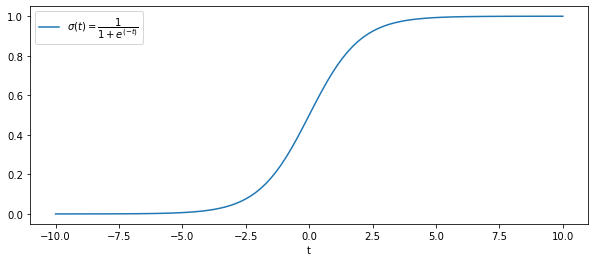

In [33]:
x_values = np.linspace(-10, 10, 100)
y_values = 1/(1+np.exp(-x_values))
plt.figure(figsize=(10, 4))
plt.plot(x_values, y_values, label="$\sigma(t) = \dfrac{1}{1+e^{(-t)}} $")
plt.xlabel("t")
plt.legend()
plt.show()

로지스틱 회귀 모델이 샘플 X가 양성 클래스에 속할 확률 $\hat{p}=h_\theta(x)$를 추정하면 이에 대한 예측 $\hat{y}$를 쉽게 구할 수 있다.

$t\lt0$이면 $\sigma(t)\lt 0.5$이고, $t \geq 0$이면 $\sigma(t) \geq 0.5$이므로 로지스틱 회귀 모델은 $\theta^TX$가 양수일 때 1, 음수일 때 0으로 예측한다.


## 6.2 훈련과 비용 함수

이제 로지스틱 회귀 모델이 어떻게 확률을 추정하고 예측하는지 알았다. 그럼 어떻게 훈련시킬까?

훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고, 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것이다.

이러한 아이디어는 하나의 훈련 샘플 x에 대해 나타낸 비용 함수인 아래의 식에 나타나 있다.

$$ c(\theta) = -log(\hat{p}) (y=1), -log(1-\hat{1-p}) (y=0) $$

이 비용 함수는 t가 0에 가까워지면 $-log(t)$가 매우 커지므로 타당하다 할 수 있다. 그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것이다.

전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것이다. 이를 **로그 손실 Log Loss**이라 부르며, 하나의 식으로 표현할 수 있다.

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})] $$

하지만 이 비용함수의 최솟값을 계산하는 알려진 해는 없으며, 다행히 볼록함수이기 때문에 경사 하강법이 전역 최솟값을 찾는 것을 보장한다. 

이 비용 함수의 j번째 모델 파라미터에 대해 편미분을 하면 아래의 식이 된다.

$$ \frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m(\sigma(\theta^TX^{(i)})-y^{(i)}){x_j}^{(i)} $$

## 6.3 결정 경계

로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용해보자. 이 데이터셋은 세 개의 품종에 속하는 붓꽃 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있다.

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기를 만들어보자. 

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [35]:
# Petal Width
X = iris["data"][:, 3:]
# 1 if Iris_Virginica else 0
y = (iris["target"] == 2).astype(np.int)

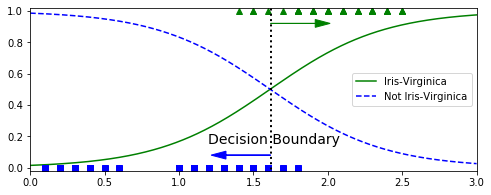

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.text(decision_boundary+0.02, 0.15, "Decision Boundary", fontsize=14, color="k", ha="center")
plt.axis([0, 3, -0.02, 1.02])
plt.legend()
plt.show()

꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Virginica 라고 강하게 확신하고, 1cm 아래일 경우 아니라고 강하게 확신한다.

이 두 극단 사이에서는 분류가 확실하지 않은데, 그렇기 때문에 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 **결정 경계 Decision Boundary**가 만들어진다.

In [37]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

이번에는 같은 데이터셋을 두 개의 특성을 사용해 살펴보자. 꽃잎 너비에 더해, 꽃잎 길이 특성을 사용한다.

In [38]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
iris["feature_names"], iris["target_names"]

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [40]:
iris["data"][0]

array([5.1, 3.5, 1.4, 0.2])

In [41]:
X_two_vars = iris["data"][:, [2,3]]
y_two_vars = (iris["target"] == 2).astype(np.int)

log_reg_two_vars = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg_two_vars.fit(X_two_vars, y_two_vars)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new_two_vars = np.c_[x0.ravel(), x1.ravel()]

y_proba_two_vars = log_reg_two_vars.predict_proba(X_new_two_vars)

---

**Note.** 사이킷런에서 `logisticRegression` 모델의 규제 강도를 조절하는 하이퍼파라미터는 (다른 선형 모델처럼) `alpha`가 아니고 그 역수에 해당하는 `C`이다.

`C`가 높을수록 모델의 규제가 줄어든다.

---

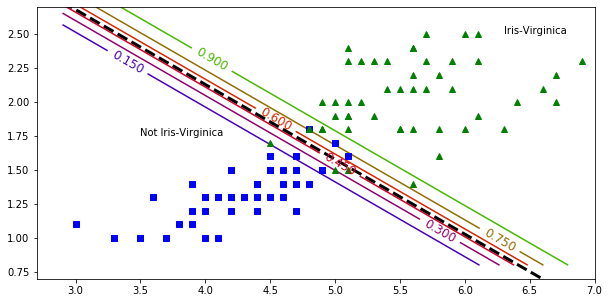

In [42]:
theta1, theta2 = log_reg_two_vars.coef_[0]
theta0 = log_reg_two_vars.intercept_[0]

plt.figure(figsize=(10, 5))
plt.axis([2.7, 7, 0.7, 2.7])

plt.plot(X_two_vars[(y==0), 0], X_two_vars[(y==0), 1], 'bs')
plt.plot(X_two_vars[(y==1), 0], X_two_vars[(y==1), 1], 'g^')

zz = y_proba_two_vars[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
plt.plot(left_right, -(theta1 * left_right + theta0) / theta2, "k--", linewidth=3)

plt.clabel(contour, inline=1, fontsize=12)

plt.text(3.5, 1.75, "Not Iris-Virginica")
plt.text(6.3, 2.5, "Iris-Virginica")

plt.show()

가운데 점선들은 모델의 N% 확률을 추정하는 선으로, 이 모델의 결정 경계이다.

이 경계는 아래의 직선 방정식을 만족시키는 선형이 된다.

$$ \theta_0 + \theta_1x_1 + \theta_2x_2 = 0 $$

모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Iris-Virginica라고 판단할 것이다.

다른 선형 모델처럼 로지스틱 회귀 모델도 $l_1, l_2$ 페널티를 사용하여 규제할 수 있다. 사이킷런은 $l_2$ 페널티를 기본으로 한다.

<br><br>
## 6.4 소프트맥스 회귀

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다.

이를 **소프트맥스 회귀 Softmax Regression** 또는 **다항 로지스틱 회귀 Multinomial Logistic Regression**라고 한다.

개념은 매우 간단하다.

샘플 x가 주어지면 각 클래스 k에 대한 점수 $s_k(x)$를 계산하고, 그 점수에 **소프트맥스 함수 Softmax Function(또는 정규화된 지수함수 Normalized Exponential라고도 부름)** 를 적용하여 각클래스의 확률을 계산한다.

$$ s_k(x) = (\theta^{(k)})^Tx $$

각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있고, 이 벡터들은 **파라미터 행렬 Parameter Matrix**에 행으로 저장된다.

---

**Note.** `LogisticRegression` 모델의 `coef_` 속성은 (클래스 수, 특성 수) 크기인 2차원 배열이다. `intercept_` 속성은 클래스 수와 크기가 같은 1차원 배열이다.

---

샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 $\hat{p}_k$를 추정할 수 있다.

이 함수는 각 점수에 지수 함수를 적용한 후 정규화한다. (모든 지수 함수 결과의 합으로 나눈다.)

$$ \hat{p}_k = \theta(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^Kexp(s_j(x))} $$

로지스틱 회귀 분류기와 마찬가지로 추정 확률이 가장 높은 클래스를 선택한다.

모델이 타깃 클래스에 대해서는 높은 확률을 (그리고 다른 클래스에 대해서는 낮은 확률을) 추정하도록 훈련해야 한다. 아래의 **크로스 엔트로피 Cross Entropy** 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다. 

크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 앞으로도 종종 사용된다.

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K{y_k}^{(i)}log({\hat{p}_k}^{(i)}) $$

딱 두 개의 클래스가 있을 때, 이 비용 함수는 로지스틱 회귀의 비용 함수와 같다.

이제 소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보자. 사이킷런의 로지스틱 회귀는 클래스가 둘 이상일 때 기본적으로 일대다 (OvA) 전략을 사용한다.

하지만 `multi_class` 매개변수를 `multinomial`로 바꾸면 소프트맥스를 사용할 수 있다.

소프트맥스 회귀를 사용하려면 `solver` 매개변수에 `lbfgs`와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다. 

In [43]:
X = iris["data"][:, [2,3]]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [44]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])